# Testing queries to create a time series

In [22]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd
from models.realtime import VehiclePosition
from models.schedule import *

In [11]:
import configparser

# Configuration file
config = configparser.ConfigParser()
config.read("./gtfs2series.cfg")

# Database information
system = config.get("database", "system")
host = config.get("database", "host")
port = config.getint("database", "port")
name = "gtfs"
user = config.get("database", "user")
password = config.get("database", "password")

In [12]:
# Create database engine and make session
engine = create_engine(f"{system}://{user}:{password}@{host}:{port}/{name}")
Session = sessionmaker(bind=engine)
session = Session()

In [13]:
# Query the database for vehicle_trip_routeId = "Orange"
route = (
    session.query(VehiclePosition)
    .filter(VehiclePosition.vehicle_trip_routeId == "39")
    .filter(VehiclePosition.vehicle_trip_directionId == 1)
)

In [14]:
df = pd.read_sql(route.statement, route.session.bind)

In [15]:
time_series = df[["vehicle_timestamp", "vehicle_occupancyPercentage"]].set_index("vehicle_timestamp")

In [16]:
time_series.head()

,vehicle_occupancyPercentage
vehicle_timestamp,
2023-11-19 22:16:16,20.0
2023-11-19 22:16:19,20.0
2023-11-19 22:16:29,20.0
2023-11-19 22:16:45,20.0
2023-11-19 22:16:57,20.0


<Axes: xlabel='vehicle_timestamp'>

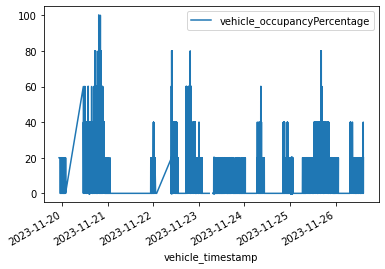

In [17]:
time_series.plot()

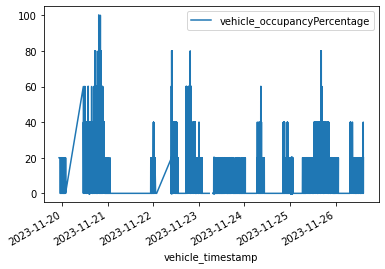

In [18]:
# Save image
fig = time_series.plot().get_figure()
fig.savefig("test.jpg")

In [20]:
len(time_series)

42680

# GTFS Schedule

## Query a route and fetch all trips linked to it

In [34]:
import configparser

# Configuration file
config = configparser.ConfigParser()
config.read("./gtfs2series.cfg")

# Database information
system = config.get("database", "system")
host = config.get("database", "host")
port = config.getint("database", "port")
name = config.get("database", "name")
user = config.get("database", "user")
password = config.get("database", "password")

In [36]:
# Create database engine and make session
engine = create_engine(f"{system}://{user}:{password}@{host}:{port}/{name}")
Session = sessionmaker(bind=engine)
session = Session()

In [48]:
feed = session.query(Feed).first()  # or get the Feed record some other way
agencies = feed.agency
routes = feed.routes

In [49]:
for route in routes:
    print(route.route_short_name)

None
None
None
B
C
D
E
None
SL1
SL2
SL3
SL4
SL5
SLW
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
CT2
CT3
1
4
7
8
9
10
11
14
15
16
17
18
19
21
22
23
24
26
28
29
30
31
32
32/33
33
34
34E
35
36
37
38
39
40
40/50
41
42
43
44
45
47
50
51
52
55
57
59
60
61
62
62/76
64
65
66
67
68
69
70
71
73
74
75
76
77
78
80
83
85
86
87
88
89
89/93
90
91
92
93
94
95
96
97
99
100
101
104
105
106
108
109
110
111
112
114
116
117
119
120
121
131
132
134
137
171
195
201
202
210
211
215
216
217
220
222
225
226
230
236
238
240
245
350
351
354
411
424
426
428
429
430
435
436
439
441
441/442
442
450
451
455
456
501
504
505
553
554
556
558
712
713
714
716
Worcester Line Shuttle
Green Line B Shuttle
Green Line Shuttle
Shuttle
Blue Line Shuttle
Commuter Rail Shuttle
North Side Commuter Rail Shuttle
South Side Commuter Rail Shuttle
Elevator Shuttle
Fairmount Line Shuttle
Fitchburg Line Shuttle
Franklin/Foxboro Line Shuttle
Green Line Shuttle
Green Line B Shuttle
Greenbush Lin

In [50]:
type(agencies)

sqlalchemy.orm.collections.InstrumentedList

In [31]:
# Query all trips for a route
trips = (
    session.query(Trip)
    .filter(Trip.feed_id == "2023-11-23T01:27:03")
    .filter(Trip.route_id == "39")
)

In [32]:
df = pd.read_sql(trips.statement, trips.session.bind)

In [33]:
df

,feed_id,trip_id,route_id,service_id,geoshape_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,2023-11-23T01:27:03,58683127,39,BUS42023-hbs43sp1-Weekday-02,None,Forest Hills,None,0,S39-40,390152,1,1
1,2023-11-23T01:27:03,58683128,39,BUS42023-hbs43sp1-Weekday-02,None,Forest Hills,None,0,S39-41,390152,1,1
2,2023-11-23T01:27:03,58683131,39,BUS42023-hbs43sp1-Weekday-02,None,Forest Hills,None,0,S39-20,390152,1,1
3,2023-11-23T01:27:03,58683133,39,BUS42023-hbs43sp1-Weekday-02,None,Forest Hills,None,0,S39-18,390152,1,1
4,2023-11-23T01:27:03,58683134,39,BUS42023-hbs43sp1-Weekday-02,None,Forest Hills,None,0,S39-19,390152,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1383,2023-11-23T01:27:03,58803555,39,ThanksgivingDay,None,Back Bay,None,1,S39-41,390145,1,1
1384,2023-11-23T01:27:03,58803559,39,ThanksgivingDay,None,Back Bay,None,1,S39-43,390145,1,1
1385,2023-11-23T01:27:03,58803562,39,ThanksgivingDay,None,Back Bay,None,1,S39-35,390145,1,1
1386,2023-11-23T01:27:03,58803563,39,ThanksgivingDay,None,Back Bay,None,1,S39-37,390145,1,1
